In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pandas_datareader.data as web
import yfinance as yf
import datetime as dt

In [ ]:
start = '2017-01-01'

df = web.DataReader('AAPL','yahoo',start)
df.head()

In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-07-25,155.039993,152.279999,154.009995,152.949997,53623900.0,152.949997
2022-07-26,153.089996,150.800003,152.259995,151.600006,55138700.0,151.600006
2022-07-27,157.330002,152.160004,152.580002,156.789993,78620700.0,156.789993
2022-07-28,157.639999,154.410004,156.979996,157.350006,81378700.0,157.350006
2022-07-29,163.630005,159.500000,161.240005,162.509995,101689200.0,162.509995


In [ ]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.257641
1,2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.227133
2,2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.365595
3,2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.670673
4,2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,27.924124


In [ ]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,29.082500,28.690001,28.950001,29.037500,115127600.0
1,29.127501,28.937500,28.962500,29.004999,84472400.0
2,29.215000,28.952499,28.980000,29.152500,88774400.0
3,29.540001,29.117500,29.195000,29.477501,127007600.0
4,29.857500,29.485001,29.487499,29.747499,134247600.0


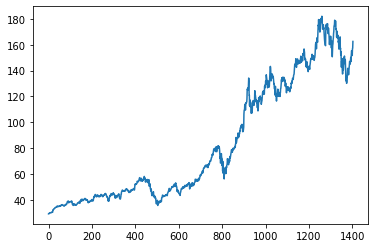

In [ ]:
plt.plot(df.Close)

In [ ]:
df

,High,Low,Open,Close,Volume
0,29.082500,28.690001,28.950001,29.037500,115127600.0
1,29.127501,28.937500,28.962500,29.004999,84472400.0
2,29.215000,28.952499,28.980000,29.152500,88774400.0
3,29.540001,29.117500,29.195000,29.477501,127007600.0
4,29.857500,29.485001,29.487499,29.747499,134247600.0
...,...,...,...,...,...
1398,155.039993,152.279999,154.009995,152.949997,53623900.0
1399,153.089996,150.800003,152.259995,151.600006,55138700.0
1400,157.330002,152.160004,152.580002,156.789993,78620700.0
1401,157.639999,154.410004,156.979996,157.350006,81378700.0


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1398    153.9333
1399    153.7837
1400    153.6893
1401    153.6311
1402    153.6632
Name: Close, Length: 1403, dtype: float64

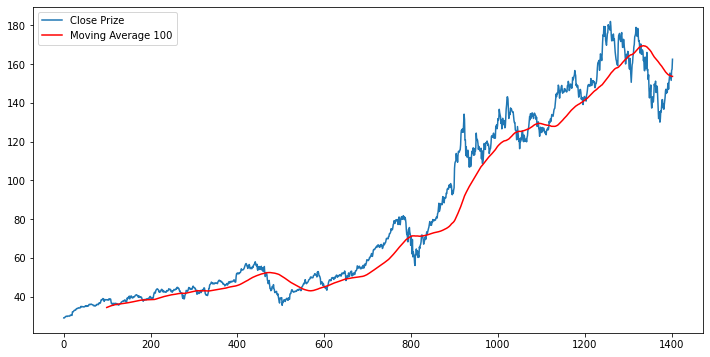

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close,label = 'Close Prize')
plt.plot(ma100,'r',label='Moving Average 100')
plt.legend()
plt.show()

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1398    158.65000
1399    158.69155
1400    158.76100
1401    158.83370
1402    158.93870
Name: Close, Length: 1403, dtype: float64

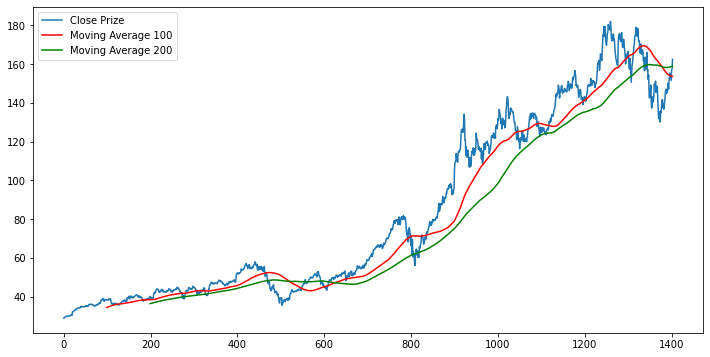

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close,label = 'Close Prize')
plt.plot(ma100,'r',label='Moving Average 100')
plt.plot(ma200,'g',label='Moving Average 200')
plt.legend()
plt.show()

In [ ]:
df.shape

(1403, 5)

In [ ]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [ ]:
print(data_training.shape)
print(data_testing.shape)

(982, 1)
(421, 1)


In [ ]:
data_training.head()

,Close
0,29.037500
1,29.004999
2,29.152500
3,29.477501
4,29.747499


In [ ]:
data_testing.head()

,Close
982,116.029999
983,116.589996
984,119.050003
985,122.720001
986,123.080002


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

C:\Python\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[3.09020420e-04],
       [0.00000000e+00],
       [1.40243405e-03],
       [4.49252944e-03],
       [7.05966580e-03],
       [7.34491124e-03],
       [8.86618395e-03],
       [7.67768851e-03],
       [7.17852260e-03],
       [9.46043167e-03],
       [9.43665668e-03],
       [8.93749077e-03],
       [9.46043167e-03],
       [9.65059529e-03],
       [9.38912484e-03],
       [1.39291680e-02],
       [1.40717998e-02],
       [1.40955566e-02],
       [1.33349203e-02],
       [1.26693657e-02],
       [3.02591018e-02],
       [2.97361609e-02],
       [3.10435132e-02],
       [3.39196518e-02],
       [3.68671336e-02],
       [3.80793859e-02],
       [3.89826540e-02],
       [3.82695495e-02],
       [4.10506245e-02],
       [4.51628448e-02],
       [4.63275471e-02],
       [4.59472561e-02],
       [4.68267311e-02],
       [4.91561720e-02],
       [5.01307470e-02],
       [4.87520880e-02],
       [4.90611084e-02],
       [4.97028698e-02],
       [4.98455197e-02],
       [5.65010652e-02],


In [ ]:
data_training_array.shape

(982, 1)

In [ ]:
x_train = []
y_train = []

for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train , y_train = np.array(x_train), np.array(y_train)

In [ ]:
# ML Model

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
28/28 [==============================] - 9s 159ms/step - loss: 0.0411
Epoch 2/100
28/28 [==============================] - 4s 158ms/step - loss: 0.0102
Epoch 3/100
28/28 [==============================] - 4s 158ms/step - loss: 0.0104
Epoch 4/100
28/28 [==============================] - 5s 192ms/step - loss: 0.0061
Epoch 5/100
28/28 [==============================] - 5s 194ms/step - loss: 0.0057
Epoch 6/100
28/28 [==============================] - 6s 197ms/step - loss: 0.0069
Epoch 7/100
28/28 [==============================] - 6s 203ms/step - loss: 0.0051
Epoch 8/100
28/28 [==============================] - 6s 199ms/step - loss: 0.0045
Epoch 9/100
28/28 [==============================] - 5s 171ms/step - loss: 0.0057
Epoch 10/100
28/28 [==============================] - 6s 199ms/step - loss: 0.0053
Epoch 11/100
28/28 [==============================] - 6s 200ms/step - loss: 0.0049
Epoch 12/100
28/28 [==============================] - 6s 197ms/step - loss: 0.0040
Epoch 13/100


In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

,Close
982,116.029999
983,116.589996
984,119.050003
985,122.720001
986,123.080002


In [ ]:
data_training.tail(100)

,Close
882,93.172501
883,95.342499
884,95.752502
885,95.919998
886,95.477501
...,...
977,118.029999
978,118.639999
979,117.339996
980,113.849998


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing,ignore_index =True)

In [ ]:
final_df

,Close
0,93.172501
1,95.342499
2,95.752502
3,95.919998
4,95.477501
...,...
516,152.949997
517,151.600006
518,156.789993
519,157.350006


In [ ]:
input_data = scaler.fit_transform(final_df)

In [ ]:
input_data

array([[0.0062364 ],
       [0.03051067],
       [0.03509709],
       [0.03697075],
       [0.03202084],
       [0.04969523],
       [0.05716204],
       [0.04371051],
       [0.04152919],
       [0.06423738],
       [0.04905199],
       [0.05210024],
       [0.00257289],
       [0.        ],
       [0.02455394],
       [0.00713132],
       [0.02712683],
       [0.0399911 ],
       [0.15263723],
       [0.18258854],
       [0.19072659],
       [0.19517314],
       [0.23812852],
       [0.2069188 ],
       [0.22498466],
       [0.18748255],
       [0.22814481],
       [0.25051742],
       [0.24937082],
       [0.24601489],
       [0.25669784],
       [0.25831981],
       [0.28704071],
       [0.35522128],
       [0.37186086],
       [0.36031098],
       [0.37929977],
       [0.36238051],
       [0.36011529],
       [0.40746123],
       [0.46495885],
       [0.43386093],
       [0.316181  ],
       [0.31707592],
       [0.22601938],
       [0.27635777],
       [0.23351419],
       [0.216

In [ ]:
input_data.shape

(521, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [ ]:
x_test , y_test = np.array(x_test), np.array(y_test)

In [ ]:
print(x_test.shape)
print(y_test.shape)

(421, 100, 1)
(421,)


In [ ]:
#Making Predictions

y_predicted = model.predict(x_test)

14/14 [==============================] - 2s 55ms/step


In [ ]:
y_predicted.shape

(421, 1)

In [ ]:
y_test.shape

(421,)

In [ ]:
y_test = y_test.reshape(-1,1)

In [ ]:
#s = scaler.scale_

In [ ]:
#scale = 1/s[0] 
#y_predicted = y_predicted * scale
#y_test = y_test * scale

In [ ]:
y_predicted = scaler.inverse_transform(y_predicted)
y_test = scaler.inverse_transform(y_test)

In [ ]:
y_predicted

array([[120.047104],
       [119.51681 ],
       [118.85361 ],
       [118.22746 ],
       [117.84863 ],
       [117.849976],
       [118.2532  ],
       [118.974915],
       [119.92142 ],
       [120.99859 ],
       [122.04382 ],
       [122.96023 ],
       [123.67474 ],
       [124.14013 ],
       [124.50758 ],
       [124.906784],
       [125.42274 ],
       [126.0185  ],
       [126.65882 ],
       [127.38984 ],
       [128.20311 ],
       [129.07484 ],
       [130.08142 ],
       [131.19128 ],
       [132.28632 ],
       [133.21568 ],
       [133.78772 ],
       [133.97028 ],
       [133.70581 ],
       [133.13084 ],
       [132.4404  ],
       [131.71594 ],
       [131.00282 ],
       [130.38957 ],
       [129.88867 ],
       [129.44675 ],
       [129.04079 ],
       [128.77803 ],
       [128.86232 ],
       [129.45375 ],
       [130.66943 ],
       [132.4827  ],
       [134.6969  ],
       [136.8691  ],
       [138.4599  ],
       [139.28264 ],
       [139.39578 ],
       [138.9

In [ ]:
y_test

array([[116.02999878],
       [116.58999634],
       [119.05000305],
       [122.72000122],
       [123.08000183],
       [122.94000244],
       [122.25      ],
       [123.75      ],
       [124.37999725],
       [121.77999878],
       [123.23999786],
       [122.41000366],
       [121.77999878],
       [127.87999725],
       [127.80999756],
       [128.69999695],
       [126.66000366],
       [128.22999573],
       [131.88000488],
       [130.96000671],
       [131.97000122],
       [136.69000244],
       [134.86999512],
       [133.72000122],
       [132.69000244],
       [129.41000366],
       [131.00999451],
       [126.59999847],
       [130.91999817],
       [132.05000305],
       [128.97999573],
       [128.80000305],
       [130.88999939],
       [128.91000366],
       [127.13999939],
       [127.83000183],
       [132.02999878],
       [136.86999512],
       [139.07000732],
       [142.91999817],
       [143.16000366],
       [142.05999756],
       [137.08999634],
       [131

In [ ]:
yp = pd.DataFrame(y_predicted,columns=(['Predicted']))

In [ ]:
yt = pd.DataFrame(y_test,columns=(['Actual']))

In [ ]:
y = pd.concat([yt,yp],axis = 1)

In [ ]:
y

,Actual,Predicted
0,116.029999,120.047104
1,116.589996,119.516808
2,119.050003,118.853607
3,122.720001,118.227463
4,123.080002,117.848633
...,...,...
416,152.949997,152.208176
417,151.600006,153.288284
418,156.789993,154.151291
419,157.350006,154.882126


In [ ]:
dd = data.DataReader('AAPL','yahoo',start)

In [ ]:
dd = dd[-421:]

In [ ]:
y = y.set_index(dd.index)

In [ ]:
y.tail(5)

,Actual,Predicted
Date,,
2022-07-25,152.949997,152.208176
2022-07-26,151.600006,153.288284
2022-07-27,156.789993,154.151291
2022-07-28,157.350006,154.882126
2022-07-29,162.509995,155.571533


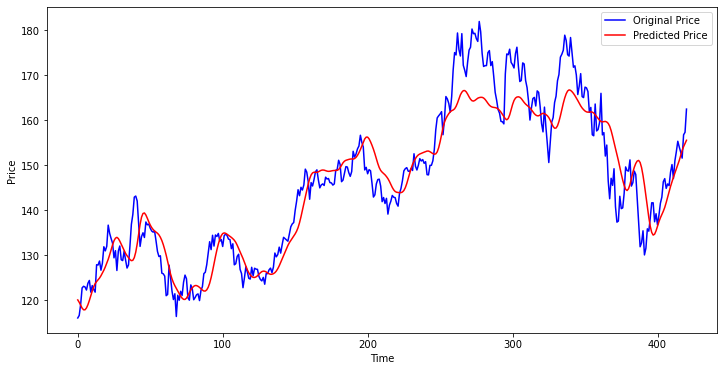

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
print(f'MAE {mean_absolute_error(y_test,y_predicted)}')
print(f'MSE {mean_squared_error(y_test, y_predicted)}')
print(f'RMSE {np.sqrt(mean_squared_error(y_test, y_predicted))}')
print(f'R2 {r2_score(y_test, y_predicted)}')

MAE 4.549606595073347
MSE 35.35670403727801
RMSE 5.946150354412341
R2 0.8734306392346255


In [ ]:
scores = [['Mean Absolute Error', mean_absolute_error(y_test,y_predicted)], ['Mean Squared Error', mean_squared_error(y_test, y_predicted)], ['Root Mean Squared Error', np.sqrt(mean_squared_error(y_test, y_predicted))],['R2 Score', r2_score(y_test, y_predicted)]]

In [ ]:
scores_f = pd.DataFrame(scores, columns=['Metrics', 'Scores'])

In [ ]:
scores_f

,Metrics,Scores
0,Mean Absolute Error,4.549607
1,Mean Squared Error,35.356704
2,Root Mean Squared Error,5.946150
3,R2 Score,0.873431
